# End to End Project - Bikes Assessment 

### Below are the details of the features list for the given Bikes data set:

- **instant**: record index

- **dteday** : date

- **season**: season (1: springer, 2: summer, 3: fall, 4: winter)

- **yr**: year (0: 2011, 1:2012)

- **mnth**: month (1 to 12)

- **hr**: hour (0 to 23)

- **holiday**: whether the day is a holiday or not

- **weekday**: day of the week

- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.

- **weathersit**:
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


- **temp**: Normalized temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*8, t_max=+39 (only in hourly scale)

- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*16, t_max=+50 (only in hourly scale)

- **hum**: Normalized humidity. The values are divided to 100 (max)

- **windspeed**: Normalized wind speed. The values are divided to 67 (max)

- **casual**: count of casual users

- **registered**: count of registered users

- **cnt**: count of total rental bikes including both casual and registered users

## We will be following the below steps to solve this problem:

1. Importing the libraries

2. Using some pre-defined utility functions

3. Loading the data

4. Cleaning the data

5. Dividing the dataset into training and test dataset
  - using train_test_split in the ratio 70:30
 
 
6. Training several models and analyzing their performance to select a model

7. Fine-tuning the model by finding the best hyper-parameters and features

8. Evaluating selected model using test dataset

# Importing the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# Load the Data

In [2]:
filePath = 'data/bikes.csv'

# read file
bikesData = pd.read_csv(filePath)
# look at first five row
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# let's get some information about data
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
# check how many rows and columns are present in the dataset
bikesData.shape

(17379, 17)

In [5]:
# how many unique values are there in yr column of bikesData
bikesData['yr'].unique()

array([0, 1], dtype=int64)

In [6]:
# let's have a quick information about numeric data
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Cleaning

As we can see, the bikesData data set contains some features which may not be needed for this problem e.g.

- **instant** - This is just an index holder.
- **casual** - It contains the count of casual bike riders, which are already included in the overall users count i.e. 'cnt', hence not needed.
- **registered** - It contains the registered bike riders, which again, like the casual riders, are already included in the overall users count i.e. 'cnt', hence not needed.
- **atemp** - It is the 'feel' temperature, which may not be needed, as we already have 'temp' feature which contains temperature of the area - duplicate feature, hence not needed.
- **dteday** - It is the Date. Since, our prediction is not based on the Date, its based on hour of the day, hence Date is not needed.

Since, these features are not needed for our current problem, let us drop them from the bikesData data set.

In [7]:
columnsToDrop = ['instant', 'casual', 'registered', 'atemp', 'dteday']

# drop above columns from the dataset
bikesData = bikesData.drop(columnsToDrop, axis=1)

In [8]:
bikesData.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,977.000000


we can see the values of features - temp, hum and windspeed - their values are in different scales (ranges), hence, we need to apply Scaling to these features values for our ML algorithms to work fine on them.

In [9]:
columnsToScale = ['temp', 'hum', 'windspeed']
# create a scaler object
scaler = StandardScaler()
bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])

# let's have a quick loot at mean and standard deviation again
bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.035529e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


In [10]:
# add new feature dayCount to bikesData data set
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

# Divide into training and test dataset

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bikesData, test_size=0.3)

# Sort the train_set and test_set values by dayCount 
train_set.sort_values('dayCount', axis=0, inplace=True)
test_set.sort_values('dayCount', axis=0, inplace=True)

print("No of training instances:", len(train_set))
print("No of testing instances:", len(test_set))

No of training instances: 12165
No of testing instances: 5214


C:\Users\Asus\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Asus\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
# Define some utility functions
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Train various Models on the Dataset

In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [14]:
# Create a dataframe called trainingCols by dropping cnt column data from 
# train_set data frame.
trainingCols = train_set.drop('cnt', axis=1)
trainingLabels = train_set.cnt

## Train DecisionTreeRegressor

In [15]:
# create a DecisionTree instance
dec_reg = DecisionTreeRegressor(random_state=42)
# calculate mae score
scores = cross_val_score(dec_reg, trainingCols, trainingLabels, 
                         cv=10, scoring='neg_mean_absolute_error',
                         )

dt_mae_scores = -scores
display_scores(dt_mae_scores)

Scores: [97.17830731 44.49548069 35.47822514 41.55875103 46.97863599 66.98848684
 56.88486842 48.30016447 46.71217105 96.99671053]
Mean: 58.1571801480128
Standard deviation: 21.072166387015205


In [16]:
# create a DecisionTree instance
dec_reg = DecisionTreeRegressor(random_state=42)
# calculate root_mean_squared_error
scores = cross_val_score(dec_reg, trainingCols, trainingLabels, 
                         cv=10, scoring='neg_mean_squared_error',
                         )
dt_mse_scores = np.sqrt(-scores)
display_scores(dt_mse_scores)

Scores: [145.34354508  69.86238968  57.67200346  66.9043824   76.32499276
 100.5161024   91.22915227  79.22061239  76.38137948 148.11951189]
Mean: 91.15740718216068
Standard deviation: 30.020304899302634


## Train LinearRegression

In [17]:
# create a LinearRegression instance
lin_reg = LinearRegression()
# calculate mean absolute error
scores = cross_val_score(lin_reg, trainingCols, trainingLabels, 
                         cv=10, scoring='neg_mean_absolute_error',
                         )

lr_mae_scores = -scores
display_scores(lr_mae_scores)

Scores: [ 67.58444525  79.75326624 114.18985039  91.13704464  77.09822969
  94.56514273 135.19146414 159.46000354 154.36174978 127.69080882]
Mean: 110.1032005198836
Standard deviation: 31.25667336721412


In [18]:
# create a LinearRegression instance
lin_reg = LinearRegression()
# calculate root mean squared error
scores = cross_val_score(lin_reg, trainingCols, trainingLabels, 
                         cv=10, scoring='neg_mean_squared_error',
                         )

lr_mse_scores = np.sqrt(-scores)
display_scores(lr_mse_scores)

Scores: [ 84.40248404 110.91427099 132.42822275 115.99475943 107.0506682
 123.46592353 179.04315267 190.38655475 198.51284134 162.61539621]
Mean: 140.48142739023214
Standard deviation: 37.317214048833506


## Train RandomForestRegressor

In [19]:
# create a RandomForestRegressor instance
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)
# calculate mean absolute error
scores = cross_val_score(forest_reg, trainingCols, trainingLabels, 
                         cv=10, scoring='neg_mean_absolute_error',
                         )

rf_mae_scores = -scores
display_scores(rf_mae_scores)

Scores: [39.65104355 29.78620104 28.9458888  31.8021364  35.88183511 51.50952851
 40.23679276 39.42881579 36.23411732 83.07612939]
Mean: 41.655248867469616
Standard deviation: 15.119487291755243


In [20]:
# create a RandomForestRegressor instance
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)
# calculate root mean squared error
scores = cross_val_score(forest_reg, trainingCols, trainingLabels, 
                         cv=10, scoring='neg_mean_squared_error',
                         )

rf_mse_scores = np.sqrt(-scores)
display_scores(rf_mse_scores)

Scores: [ 52.75464435  45.25493169  43.8619015   53.10216164  59.7800585
  83.59528829  61.59514356  64.04800117  58.23516399 127.73046018]
Mean: 64.99577548714015
Standard deviation: 23.440562217231722


# Training XGBRegressor

In [21]:
# # create a XGBoost instance
# xgb_reg = XGBRegressor(random_state=42)
# # calculate mean absolute error
# scores = cross_val_score(xgb_reg, trainingCols, trainingLabels, 
#                          cv=10, scoring='neg_mean_absolute_error',
#                          )

# xgb_mae_scores = -scores
# display_scores(xgb_mae_scores)

In [22]:
# # create a XGBoost instance
# xgb_reg = XGBRegressor(random_state=42)
# # calculate mean absolute error
# scores = cross_val_score(xgb_reg, trainingCols, trainingLabels, 
#                          cv=10, scoring='neg_mean_squared_error',
#                          )

# xgb_mae_scores = np.sqrt(-scores)
# display_scores(xgb_mae_scores)

# Hyperparameter Tuning (Randdom Forest Model) using GS

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 
     'max_depth': [15, 28]}
]
# Let us instantiate the GridSearchCV 
grid_search = GridSearchCV(forest_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error')

In [24]:
# Run the Grid Search algorithm on the Training data set
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [25]:
print("best estimator:", grid_search.best_estimator_)
print("best hyperparameters:", grid_search.best_params_)

best estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
best hyperparameters: {'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [26]:
# Get the relative importance of each feature 
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00428397 0.00611108 0.00505925 0.57994325 0.00214003 0.01918827
 0.07444927 0.01679635 0.0970472  0.02976592 0.00915382 0.1560616 ]


# Prepare to test the final model on Test dataset

In [27]:
# store the best estimators
final_model = grid_search.best_estimator_

In [28]:
# Sort the values of test_set by 'dayCount'
test_set.sort_values('dayCount', axis= 0, inplace=True)

C:\Users\Asus\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# Drop the cnt column(feature) from test_set dataframe
test_x_cols = (test_set.drop('cnt', axis=1)).columns.values
# Save the cnt string in test_y_cols variable
test_y_cols = 'cnt'

In [30]:
# Extract the values of test_x_cols columns(features) of test_set 
# dataframe and store them in X_test dataframe variable.
X_test = test_set.loc[:, test_x_cols]

# Extract the value of test_y_cols column of test_set 
# dataframe and store it in y_test variable.
y_test = test_set.loc[:, test_y_cols]

## Make Predictions on the Test dataset using Final Model

In [31]:
test_set.loc[:, 'predictedCounts_test'] = final_model.predict(X_test) 

C:\Users\Asus\anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Asus\anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
# calculate mean squared error on test set
mse = mean_squared_error(y_test, test_set['predictedCounts_test'])

In [33]:
# Calculate the 'root mean square error' from the 'mse'
final_mse = np.sqrt(mse)

In [34]:
print("Final MSE:", final_mse)

Final MSE: 41.309064022155056


## Plot predicted values v/s actual values

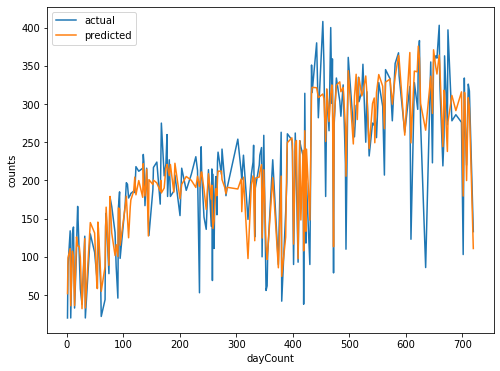

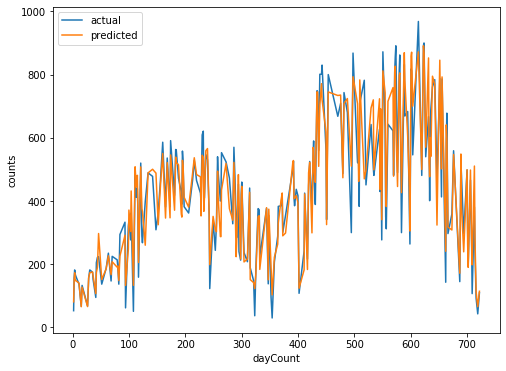

In [36]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax, label="actual")
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax, label="predicted")
    ax.set_ylabel('counts')
    ax.legend()
    plt.show()